## Стратегия пересечения скользящих средних
Стратегия пересечения скользящих средних (Moving Average Crossover Strategy) является одной из самых популярных и простых в алготрейдинге. Она основана на использовании двух скользящих средних: краткосрочной и долгосрочной, для определения сигналов на покупку и продажу. Давайте рассмотрим этот подход максимально подробно.

### Основные концепции
1. **Краткосрочная скользящая средняя (SMA):** Это средняя цена актива за короткий период времени. Она более чувствительна к недавним изменениям цен.
2. **Долгосрочная скользящая средняя (SMA):** Это средняя цена актива за более длительный период времени. Она сглаживает колебания цен и показывает долгосрочный тренд.
### Логика стратегии
* **Сигнал на покупку (Buy Signal):** возникает, когда краткосрочная SMA пересекает долгосрочную SMA снизу вверх. Это указывает на то, что цена начинает расти, и это хорошее время для покупки.
* **Сигнал на продажу (Sell Signal):** возникает, когда краткосрочная SMA пересекает долгосрочную SMA сверху вниз. Это указывает на то, что цена начинает падать, и это хорошее время для продажи.
### Этапы разработки стратегии

### 1. Сбор данных

Для начала нам нужны исторические данные по цене акций. В этом примере мы будем использовать акции Apple Inc. (AAPL) и библиотеку yfinance для загрузки данных.

In [2]:
import yfinance as yf
import numpy as np

# Выбор тикера и загрузка данных
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960472,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251129,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826859,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484329,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650352,132079200


### 2. Подготовка данных

Вычислим краткосрочную и долгосрочную скользящие средние. Обычно используют 50-дневную SMA как краткосрочную и 200-дневную SMA как долгосрочную.

In [3]:
# Вычисление краткосрочной и долгосрочной скользящих средних
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()
data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_200
Date,,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960472,135480400,NaN,NaN
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251129,146322800,NaN,NaN
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826859,118387200,NaN,NaN
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484329,108872000,NaN,NaN
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650352,132079200,NaN,NaN


### 3. Определение сигналов

Определим сигналы на покупку и продажу на основе пересечения скользящих средних.

In [4]:
# Определение сигналов на покупку и продажу
data['Signal'] = 0
data.iloc[50:, data.columns.get_loc('Signal')] = np.where(data.iloc[50:, data.columns.get_loc('SMA_50')] > data.iloc[50:, data.columns.get_loc('SMA_200')], 1, 0)
data['Position'] = data['Signal'].diff()

# Печать первых строк данных
print(data.head())

# Печать строк с сигналами
print(data.loc[data['Signal'] == 1].head())

                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.960472  135480400   
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.251129  146322800   
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.826859  118387200   
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.484329  108872000   
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.650352  132079200   

            SMA_50  SMA_200  Signal  Position  
Date                                           
2020-01-02     NaN      NaN       0       NaN  
2020-01-03     NaN      NaN       0       0.0  
2020-01-06     NaN      NaN       0       0.0  
2020-01-07     NaN      NaN       0       0.0  
2020-01-08     NaN      NaN       0       0.0  
                  Open        High         Low       Close   Adj Close  \
Date                         

### 4. Backtesting стратегии

Проведем тестирование стратегии на исторических данных, чтобы оценить её эффективность. Будем использовать начальный баланс в 10,000 USD.

In [5]:
initial_balance = 10000  # Начальный баланс в USD
balance = initial_balance
position = 0  # Количество акций
data['Portfolio Value'] = balance

# Симуляция выполнения торговых операций
for index, row in data.iterrows():
    if row['Position'] == 1 and balance > 0:  # Покупка
        position = balance / row['Close']
        balance = 0
        print(f"Buy {position:.2f} shares at {row['Close']:.2f} on {index}")
    elif row['Position'] == -1 and position > 0:  # Продажа
        balance = position * row['Close']
        position = 0
        print(f"Sell shares at {row['Close']:.2f} on {index}")
    data.at[index, 'Portfolio Value'] = balance + (position * row['Close'])

# Оценка результатов
final_balance = balance + (position * data['Close'].iloc[-1])
profit = final_balance - initial_balance
print(f"Начальный баланс: ${initial_balance:.2f}")
print(f"Конечный баланс: ${final_balance:.2f}")
print(f"Прибыль: ${profit:.2f}")

Buy 82.84 shares at 120.71 on 2020-10-15 00:00:00
Sell shares at 145.38 on 2022-06-03 00:00:00
Buy 80.38 shares at 149.84 on 2022-09-28 00:00:00
Sell shares at 138.20 on 2022-09-30 00:00:00
Начальный баланс: $10000.00
Конечный баланс: $11108.15
Прибыль: $1108.15


/var/folders/r8/f9pnzbcd4rq_1f11k5rtm6w40000gn/T/ipykernel_2203/3020015483.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9859.994826093603' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.at[index, 'Portfolio Value'] = balance + (position * row['Close'])


In [9]:
data.loc[data['Signal'] == 1].head()

,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_200,Signal,Position,Portfolio Value
Date,,,,,,,,,,,
2020-10-15,118.720001,121.199997,118.150002,120.709999,118.099770,112559200,116.922999,88.593500,1,1.0,10000.000000
2020-10-16,121.279999,121.550003,118.809998,119.019997,116.446297,115393800,117.025349,88.813162,1,0.0,9859.994826
2020-10-19,119.959999,120.419998,115.660004,115.980003,113.472046,120639300,117.122699,89.021275,1,0.0,9608.152120
2020-10-20,116.199997,118.980003,115.629997,117.510002,114.968971,124423700,117.218349,89.234075,1,0.0,9734.902082
2020-10-21,116.669998,118.709999,116.449997,116.870003,114.342796,89946000,117.368250,89.445437,1,0.0,9681.882498


### 5. Визуализация результатов

Визуализируем цены акций и сигналы на покупку и продажу, а также стоимость портфеля с течением времени.

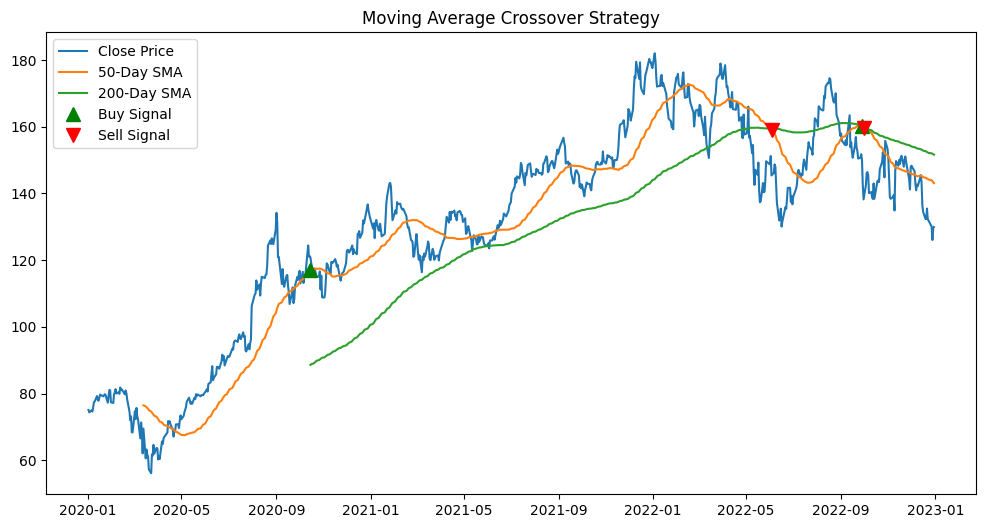

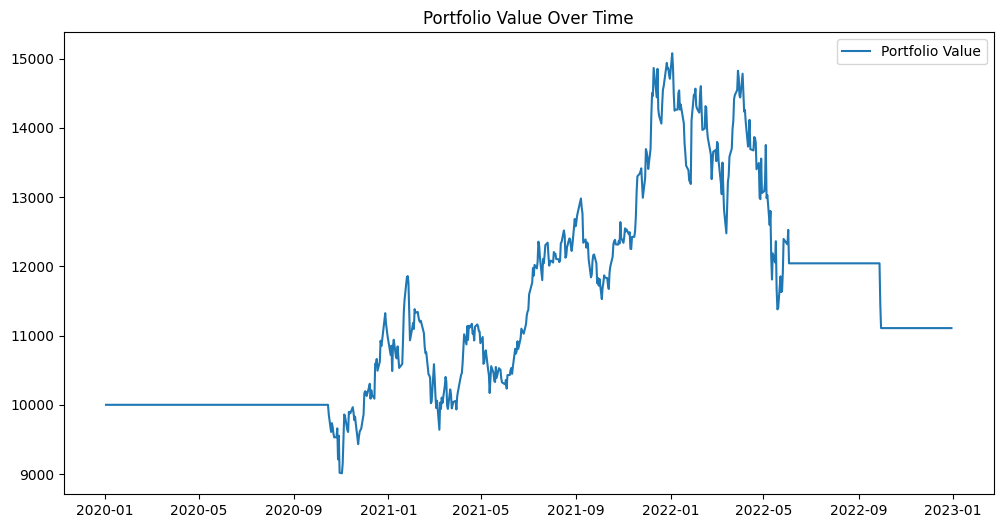

In [7]:
import matplotlib.pyplot as plt

# Визуализация цен акций и сигналов на покупку/продажу
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_50'], label='50-Day SMA')
plt.plot(data['SMA_200'], label='200-Day SMA')
plt.plot(data[data['Position'] == 1].index, data['SMA_50'][data['Position'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(data[data['Position'] == -1].index, data['SMA_50'][data['Position'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')
plt.legend(loc='best')
plt.title('Moving Average Crossover Strategy')
plt.show()

# Визуализация стоимости портфеля
plt.figure(figsize=(12,6))
plt.plot(data['Portfolio Value'], label='Portfolio Value')
plt.legend(loc='best')
plt.title('Portfolio Value Over Time')
plt.show()


### Оценка эффективности
Для оценки эффективности стратегии можно использовать различные метрики:

1. Общая прибыль: разница между начальным и конечным балансом.
2. Максимальная просадка (Maximum Drawdown): наибольшее снижение стоимости портфеля от максимума до минимума за определенный период.
3. Коэффициент Шарпа (Sharpe Ratio): измеряет доходность стратегии с учетом её волатильности.
4. Процент прибыльных сделок: доля прибыльных сделок от общего числа сделок.
### Преимущества и недостатки стратегии
##### Преимущества
* **Простота реализации: стратегия легко реализуется с использованием стандартных библиотек Python.
* Понятность: легко понять и интерпретировать сигналы на покупку и продажу.
* Работа на различных рынках: стратегия может применяться к различным финансовым инструментам (акции, криптовалюты, фьючерсы).
##### Недостатки
* Запаздывание сигналов: скользящие средние являются запаздывающими индикаторами, что может приводить к задержке сигналов.
* Рынки без тренда: стратегия плохо работает на рынках без четко выраженного тренда, когда цены движутся в боковом коридоре.
* Ложные сигналы: на волатильных рынках может быть много ложных сигналов, что приведет к частым сделкам и повышенным издержкам.

Эта стратегия может быть улучшена путем добавления дополнительных фильтров и индикаторов, использования более сложных моделей машинного обучения для предсказания трендов и оптимизации параметров стратегии на исторических данных.